# Đồ án cuối kì
Thông tin nhóm:
1. Lê Hồng Huy - 18120182
2. Nguyễn Thị Minh Vượng - 18120265
<br/><br/>

Github làm việc [tại đây](https://github.com/MinhVuong2000/P4DS-FinalProject)

---

## Môi trường code

In [20]:
import sys
sys.executable

'C:\\Users\\lhong\\anaconda3\\python.exe'

---

## Import các thư viện cần thiết

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
# YOUR CODE HERE (OPTION) 

---

## Thu thập dữ liệu

- **Dữ liệu**: Dữ liệu được lấy từ Kaggle, là tập [Heart Failure Prediction Dataset](https://www.kaggle.com/fedesoriano/heart-failure-prediction)
- **Nguồn**: Bộ dữ liệu này được tạo ra bằng cách kết hợp các bộ dữ liệu khác nhau đã có sẵn độc lập nhưng không được kết hợp trước đó. Trong bộ dữ liệu này, 5 bộ dữ liệu tim được kết hợp gồm 11 thuộc tính chung và 918 dòng, làm cho nó trở thành bộ dữ liệu bệnh tim lớn nhất có sẵn cho đến nay cho mục đích nghiên cứu:
    - Cleveland: 303 quan sát
    - Hungarian: 294 quan sát
    - Switzerland: 123 quan sát
    - Long Beach VA: 200 quan sát
    - Stalog (Heart) Data Set: 270 quan sát
- **Giấy phép**: Open Data Commons Open Database License (ODbL) v1.0



### Tải dữ liệu 

In [3]:
!wget -O data.csv https://gist.githubusercontent.com/MinhVuong2000/8286380838ef575032894dceab5072ed/raw/cc96ec954cc1d94c0548a32f64ff29ba3f8390bf/heart.csv

--2022-01-16 21:06:55--  https://gist.githubusercontent.com/MinhVuong2000/8286380838ef575032894dceab5072ed/raw/cc96ec954cc1d94c0548a32f64ff29ba3f8390bf/heart.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35921 (35K) [text/plain]
Saving to: ‘data.csv’

data.csv            100%[===================>]  35.08K  --.-KB/s    in 0.06s   

2022-01-16 21:06:56 (603 KB/s) - ‘data.csv’ saved [35921/35921]



### Đọc dữ liệu

In [4]:
df = pd.read_csv('data.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


---

## Khám phá dữ liệu


### Dữ liệu gồm bao nhiêu dòng và bao nhiêu cột ?

In [5]:
num_rows, num_cols = df.shape
print(f"Số dòng là: {num_rows}, số cột là: {num_cols}")

Số dòng là: 918, số cột là: 12


Như vậy tập dữ liệu có 918 dòng và 12 cột.

Số dòng thì đúng rồi, Nhưng trong tài liệu ghi 11 cột? -> Do cột còn lại là nhãn, tức cột HeartDisease

### Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không ?

Theo mô tả của dữ liệu thì mỗi dòng sẽ chứa 11 đặc điểm lâm sàng để dự đoán sự kiện bị bệnh tim ở 1 người và theo dữ liệu thì không có dòng nào "lạc loài"

### Dữ liệu có các dòng bị lặp không?

In [6]:
have_duplicated_rows = df.duplicated().sum()
if have_duplicated_rows:
    print('Dữ liệu có quan sát bị trùng!')
else:
    print('Dữ liệu không có dòng nào bị trùng!')

Dữ liệu không có dòng nào bị trùng!


Như vậy output này là hợp lí. Vì theo trong tài liệu trên Kaggle cũng đã ghi rõ, từ tổng số 1190 quan sát với 272 quan sát trùng, người ta đưa đến tập dữ liệu cuối cùng gồm 918 quan sát.

### Mỗi cột có ý nghĩa gì?

Dưới đây là mô tả về tập dữ liệu trên Kaggle:
- **Age**: tuổi của bệnh nhân [years]
- **Sex**: giới tính bệnh nhân [M: Male, F: Female]
- **ChestPainType**: kiểu đau ngực [TA: đau nhói ngực điển hình, ATA: đau thắt ngực không điển hình, NAP: đau thắt lưng không điển hình, ASY: Không có triệu chứng]
- **RestingBP**: huyết áp lúc nghỉ [mm Hg]
- **Cholesterol**: chỉ số cholesterol [mm/dl]
- **FastingBS**: chỉ số đường huyết lúc đói có lớn hơn 120mg/dl hay không [1: có, 0: không]
- **RestingECG**: kết quả điện tâm đồ lúc nghỉ [Normal: bình thường, ST: có bất thường sóng ST-T (đảo ngược sóng T và/hoặc ST chênh lên hoặc trầm xuống> 0,05 mV), LVH: cho thấy phì đại thất trái có thể xảy ra hoặc xác định theo tiêu chuẩn của Estes]
- **MaxHR**: nhịp tim tối đa đạt được [con số giữa 60 và 202]
- **ExerciseAngina**: đau thắt ngực do tập thể dục [Y: Có, N: Không]
- **Oldpeak**: oldpeak = ST [Giá trị số được đo bằng độ trầm cảm]
- **ST_Slope**: độ dốc của bài tập đỉnh cao Đoạn ST [Up: dốc lên, Flat: bằng phẳng, Down: dốc xuống]
- **HeartDisease**: nhãn [1: có bệnh, 0: bình thường]

### Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?

In [7]:
print('Kiểu dữ liệu của các cột trong tập dữ liệu:')
df.dtypes

Kiểu dữ liệu của các cột trong tập dữ liệu:


Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

### Với mỗi cột có kiểu dữ liệu dạng numeric, các giá trị được phân bố như thế nào?

Có 7 cột có kiểu dữ liệu dạng số: Age, RestingBP, Cholesterol, FastingBS, MaxHR, Oldpeak, và HeartDisease. 

Tuy nhiên, 
- cột HeartDisease thực chất thuộc loại categorical (trả lời câu hỏi có hay không bị bệnh), 
- Cột FastingBS cũng là trả lời có hay không cao hơn ngưỡng đưa ra (ở đây là 120mg/dl)

Nên ta chỉ xét 5 cột còn lại: Age, Cholesterol, FastingBS, MaxHR, Oldpeak là thực sự thuộc kiểu dữ liệu dạng số 

#### Lấy 6 cột vừa nói và xem xét tỉ lệ giá trị thiếu, min max của từng cột

In [8]:
def missing_ratio(col):
    return col.isna().mean() * 100

nume_col_df = df[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']]
nume_col_profiles_df = nume_col_df.agg([missing_ratio , min, max])
nume_col_profiles_df

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
missing_ratio,0.0,0.0,0.0,0.0,0.0
min,28.0,0.0,0.0,60.0,-2.6
max,77.0,200.0,603.0,202.0,6.2


Như vậy, các cột thuộc kiểu numeric không có giá trị thiếu. Min max ta thấy hiện tại cũng chưa có gì bất thường

### Với mỗi cột có kiểu dữ liệu dạng categorical, các giá trị được phân bố như thế nào? 

Có 7 cột dữ liệu dạng categorical: Sex, ChestPainType, FastingBS, RestingECG, ExerciseAngina, ST_Slope and HeartDisease. 

In [9]:
def num_diff_vals(s):
    return s.nunique()
def diff_vals(s):
    return s.dropna().unique()
cate_col_profiles_df=df[["Sex", "ChestPainType",
                             "RestingECG", "ExerciseAngina", "ST_Slope","FastingBS"]]
cate_col_profiles_df=cate_col_profiles_df.agg([missing_ratio, num_diff_vals, diff_vals])
cate_col_profiles_df

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope,FastingBS
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0
num_diff_vals,2,4,3,2,3,2
diff_vals,"[M, F]","[ATA, NAP, ASY, TA]","[Normal, ST, LVH]","[N, Y]","[Up, Flat, Down]","[0, 1]"


---

## Đặt câu hỏi

### Câu hỏi 3: Các nhóm tuổi ảnh hưởng như thế nào đến kết quả bị bệnh tim hay không ?

#### Nếu giải quyết câu hỏi sẽ: 
- Biết được tỉ lệ giới tính nào sẽ có nguy cơ cao hơn trong việc mắc các bệnh về tim mạch
- Đưa ra các phương án phòng ngừa, tầm soát phù hợp cũng như có kế hoạch dự đoán thích hợp đối với các đối tượng nguy cơ dựa trên giới tính

Cách bước tiến hành:
- **Bước 1**: Tính tỉ lệ mắc bệnh tim giữa các giới tính dựa trên dữ liệu, kết quả được lưu vào dataframe sex_ratio
- **Bước 2**: Vẽ biểu đồ cột thể hiện tỉ lệ mắc bệnh tim giữa các giới tính

Code bước 1.

In [10]:
sex_ratio = df.groupby(['Sex','HeartDisease']).size().unstack()/df.shape[0]

Code bước 2.

(array([0, 1]), [Text(0, 0, 'F'), Text(1, 0, 'M')])

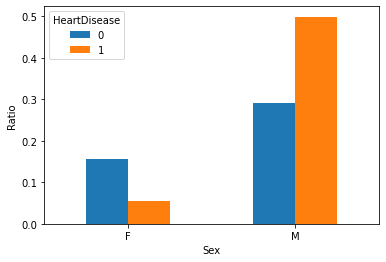

In [11]:
sex_ratio.plot.bar(ylabel='Ratio')
plt.xticks(rotation=0)

Theo như đồ thị, ta có thể thấy số lượng giới tính nam nhiều hơn so với giới tính nữ trong tập dữ liệu này

Như vậy, dựa trên dữ liệu, ta có thể nhận xét sơ bộ tỉ lệ mắc bệnh của nam cao hơn của nữ

Tuy nhiên, nhận xét này có vẻ chưa thuyết phục lắm vì do cần phải xem xét độ tuổi và nhiều yếu tố khảo sát khác nữa

### Câu hỏi 2

- Nội dung: Tuổi và Nhịp tim tối đa ảnh hưởng như thế nào đến việc dễ mắc bệnh tim?
- Ý nghĩa: Giúp ta biết được ảnh hưởng của tuổi và nhịp tim tối đa đến bệnh tim

Để trả lời cho câu hỏi này, ta tiến hành:
- Bước 1: Lấy tập dữ liệu gồm Age, MaxHR, HeartDisease và gom nhóm theo HeartDisease
- Bước 2: vẽ biểu đồ cột với:
    + trục hoành là Age, 
    + trục tung là MaxHR, 
    + phân biệt giá trị theo HeartDisease theo màu và marker

Code bước 1

In [12]:
age_maxHR_label = df[['HeartDisease','Age','MaxHR']].groupby('HeartDisease')

Code bước 2

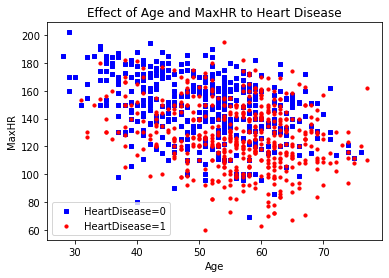

In [13]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

cs = ['b', 'r'] # color by group in data
markers = ['s', 'o'] # marker by group in data

for key, group in age_maxHR_label:
    ax1.scatter(group['Age'], group['MaxHR'], s=10, c=cs[key], marker=markers[key], label='HeartDisease='+str(key))

plt.legend(loc='lower left');
plt.xlabel('Age')
plt.ylabel('MaxHR')
plt.title('Effect of Age and MaxHR to Heart Disease')

plt.show()

Từ hình trên, ta nhận xét rằng những người có tuổi càng cao nhưng nhịp tim tối đa càng thấp thì dễ bị mắc bệnh

### Câu hỏi 3: Các nhóm tuổi ảnh hưởng như thế nào đến kết quả bị bệnh tim hay không ?

#### Nếu giải quyết câu hỏi sẽ: 
- Biết được nhóm tuổi nào sẽ có nguy cơ cao hơn trong việc mắc các bệnh về tim mạch
- Đưa ra các phương án phòng ngừa, tầm soát phù hợp cũng như có kế hoạch dự đoán thích hợp đối với các đối tượng nguy cơ dựa trên nhóm tuổi

#### Tiền xử lý & Phân tích để trả lời câu hỏi
- Để tiện cho việc xử lý dữ liệu, tiến hành thêm 1 cột trong dataframe ban đầu là chia cột tuổi thành 3 nhóm `young`, `middle_aged` và `old`

In [14]:
df["Age_group"] = pd.cut(x=df["Age"], bins=[0,30,60,100], labels=["young","middle_aged","old"])

Tiến hành vẽ dữ liệu theo như câu 1 để xem có gì hay không nhé

<AxesSubplot:xlabel='Age_group', ylabel='Ratio'>

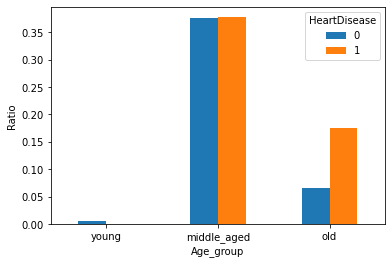

In [15]:
temp = df.groupby(['Age_group','HeartDisease']).size().unstack()/df.shape[0]
temp.plot.bar(ylabel="Ratio", rot=0)

Oh Wao, ta nhận thấy có vẻ ở nhóm tuổi `middle_aged` thì tỉ lệ bệnh tim và không bệnh tim gần như là bằng nhau vậy thì ở độ tuổi này sẽ có các yếu tố nguy cơ khác ảnh hưởng, vậy làm sao tìm ra đây ? Liệu nếu việc chia tỉ lệ độ tuổi khác nhau có ảnh hưởng hay không ? Cùng thử xem

<AxesSubplot:xlabel='Age_group_2'>

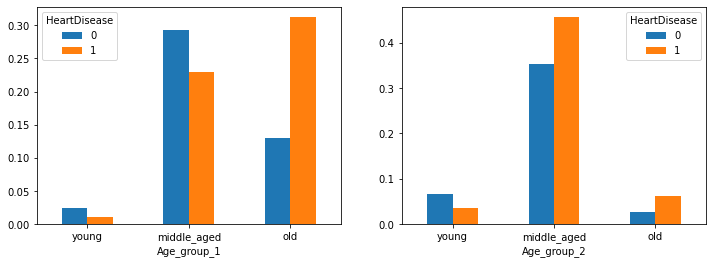

In [16]:
df["Age_group_1"] = pd.cut(x=df["Age"], bins=[0,35,55,100], labels=["young","middle_aged","old"])
temp1 = df.groupby(['Age_group_1','HeartDisease']).size().unstack()/df.shape[0]

df["Age_group_2"] = pd.cut(x=df["Age"], bins=[0,40,65,100], labels=["young","middle_aged","old"])
temp2 = df.groupby(['Age_group_2','HeartDisease']).size().unstack()/df.shape[0]

fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_figheight(4)
fig.set_figwidth(12)
temp1.plot.bar(ax=axes[0], rot=0)
temp2.plot.bar(ax=axes[1], rot=0)


Từ dữ liệu quan sát, ta nhận thấy ở lứa tuổi `middle_aged` ở cả 3 cách chia độ tuổi đều không thể xác định được tỉ lệ bệnh tim ở các độ tuổi này, nhưng riêng với độ tuổi `old` và  `young` ta đều thấy tỉ lệ mắc bệnh tim ở độ tuổi `young ` luôn thấp hơn và `old` luôn cao hơn

### Câu hỏi 4

- Nội dung: Chỉ số Choresterol theo giới tính ảnh hưởng như thế nào đến bệnh tim
- Ý nghĩa: giúp ta biết hơn về các chỉ số choresterol ở mỗi độ tuổi là tốt hay xấu

Để trả lời câu hỏi, ta tiến hành:
- Bước 1: gom nhóm dữ liệu gồm các cột: Sex, Choresterol, HeartDisease theo (HeartDisease, Sex)
          và lấy mean giá trị rồi chuyển thành dataframe
- Bước 2: vẻ biểu đồ cột chồng để thể hiện với trục hoành là giới tính, trục tung là lượng trung bình cholesterol, và được chia theo màu sắc dựa trên nhãn

Code bước 1

In [17]:
chol_sex_label = df[['Sex', 'Cholesterol', 'HeartDisease']]
chol_by_sex_label = chol_sex_label.groupby(['Sex', 'HeartDisease'])
mean_chol_by_sex_label = chol_by_sex_label.mean().unstack()

Code bước 2

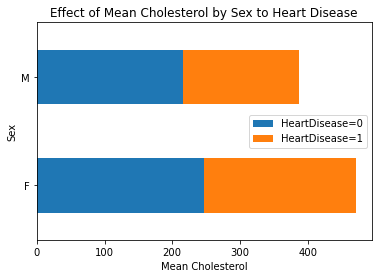

In [18]:
mean_chol_by_sex_label.plot.barh(stacked=True, title='Effect of Mean Cholesterol by Sex to Heart Disease')
plt.legend(['HeartDisease=0','HeartDisease=1'])
plt.xlabel('Mean Cholesterol');

Qua biểu đồ ta thấy lượng cholesterol trung bình của nữ ở mức an toàn(tức không mắc bệnh) là cao hơn của nam

---

## Nhìn lại quá trình làm đồ án

### Huy
1. **Những khó khăn**: 
    - Khó khăn đầu tiên là việc lựa chọn data để tiến hành làm đồ án, giữa rất nhiều data được chia sẻ trên mạng, cần tìm ra data phù hợp để tiến hành phân tích và trả lời câu hỏi cũng là khó khăn đầu tiên. Tiếp theo là việc review lại các kiến thức đã được học, các kiến thức được học chủ yếu là nhớ các công việc mà các công cụ có thể làm, việc nhớ cú pháp khá khó khăn.
2. **Những điều học được**: 
    - Học được cách tự giải quyết vấn đề, đồ án tuy làm chung nhóm nhưng vẫn phải chia các branch khác nhau để làm nên vẫn đề cao khả năng làm việc độc lập. Hiểu được thêm về đồng đội trong đồ án, cũng là đồng đội trong luận văn, hiểu nhau nhiều hơn để có thể làm việc cùng nhau tốt hơn.

### Vượng
1. Những khó khăn gặp phải:
    - Do dữ liệu nhóm lấy có nhãn - phục vụ cho bài toán classification, nên các giá trị cũng ảnh hưởng bởi nhãn, do đó các góc nhìn nó có phụ thuộc nhiều vào nhãn
    - Dữ liệu khá sạch dẫn đến nhóm không có nhiều bước để tiền xử lý dữ liệu, thấy hơi thiếu thiếu
2. Học được điều hữu ích:
    - Biết được các thông số liên quan đến bệnh tim
    - Biết được các chỉ số như thế nào dễ ảnh hưởng đến bệnh tim (nhờ vào phân tích và kiểm tra lại kết quả thống kê thông qua các tờ báo y khoa và hỏi bạn học y


- **Nếu có thêm thời gian**: Nhóm thấy những phân tích hiện tại đã ổn, nếu có chăng phát triển thì sẽ xây dựng model để học và xem xét feature important để biết được các giá trị ảnh hưởng đến bệnh tim

## Tài liệu tham khảo

1. https://www.kaggle.com/fedesoriano/heart-failure-prediction
2. Bài tập HW3 của thầy
3. https://stackoverflow.com/questions/4270301/matplotlib-multiple-datasets-on-the-same-scatter-plot
4. https://pandas.pydata.org/docs/reference/frame.html
5. https://opendatacommons.org/licenses/odbl/1-0/